In [1]:
# Cargamos el notebool que hemos hecho en "Limpieza_de_datos"
%run Limpieza_de_datos.ipynb

Nuestro dataset tiene 119390 instancias con 32 atributos.
Tenemos 79330 instancias con el City Hotel. Y tenemos 40060 instancias con el Resort Hotel.
Nuestro dataset tiene ahora 71181 instancias con 31 atributos.
Tenemos 322 instancias con atributo adults = 0
Tenemos 186 instancias con atributos stays_in_week_nights & stays_in_weekend_nights = 0
Tenemos 323 instancias con atributo adr = 0


<Figure size 640x480 with 1 Axes>

<Figure size 1400x600 with 1 Axes>

<Figure size 1200x800 with 1 Axes>

Nuestro dataset tiene 70349 instancias con 23 atributos.


<Figure size 1000x700 with 2 Axes>

<Figure size 1000x800 with 1 Axes>

# 3. Familiarización con la información del dataset

Con la finalidad de tener un mejor conocimiento sobre los datos con los que estamos tratando hemos creado una sección para analizarlos brevemente. De esta manera, crearemos algunos gráficos que nos ayudarán a entender mejor el contexto en el que estamos trabajando.

### 3.1 Diferencia entre reservas con el *lead_time*

Text(0.5, 0, 'Reservas')

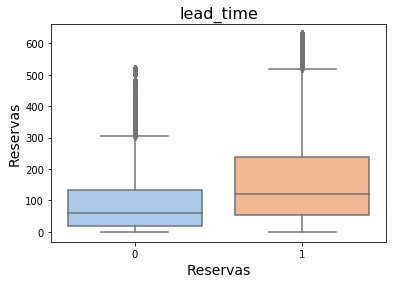

In [44]:
#Graficamos la diferencia que puede haber con los dias de antelacion de reserva si se cancela o no
a = sns.boxplot (x="is_canceled", y="lead_time", data=df_clean_aux, palette="pastel")
a.set_title('lead_time', fontsize=16)
a.set_ylabel('Reservas', fontsize= 14)
a.set_xlabel('Reservas', fontsize= 14)


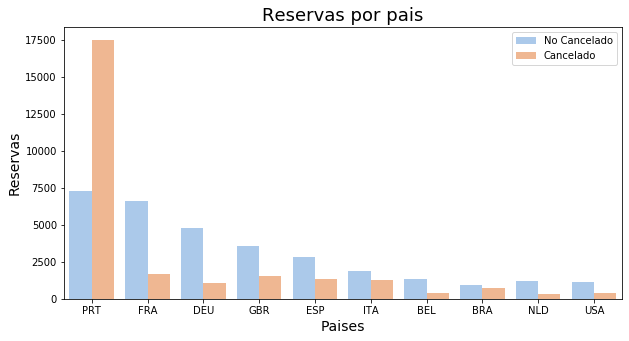

In [40]:
plt.figure(figsize=(10,5))
nochess = sns.countplot(x="country", hue="is_canceled", data=df_clean, palette="pastel", 
                       order = df_clean['country'].value_counts().iloc[:10].index)
nochess.set_title('Reservas por pais', fontsize=18)
nochess.set_ylabel('Reservas', fontsize= 14)
nochess.set_xlabel('Paises', fontsize= 14)
plt.legend(loc= "upper right", labels= ["No Cancelado", "Cancelado"])

In [61]:
df_clean["is_canceled"][(df_clean['country']=="PRT") & (df_clean['is_canceled']==1)].count()

17509

In [62]:
df_clean["is_canceled"][(df_clean['country']=="PRT") & (df_clean['is_canceled']==0)].count()

7313

In [64]:
suma=7313+17509
17509/suma
#7313/suma

0.7053823221335912

In [47]:
df_clean.groupby("is_canceled").mean()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,,,,,,,,,,,,,,,
0,88.710265,27.258867,15.862781,0.843535,2.205204,1.895848,0.098553,0.006499,0.006099,0.007698,0.020870,28.024170,109.739788,0.036842,0.779000
1,155.094364,27.356493,15.805702,0.800000,2.284245,1.915689,0.078972,0.001879,0.010415,0.160580,0.000626,28.290178,104.850248,0.000000,0.287508


In [52]:
hola=df_clean[['lead_time', 'total_of_special_requests', 'adr', "is_canceled"]]
hola.groupby("is_canceled").mean()

,lead_time,total_of_special_requests,adr
is_canceled,,,
0,88.710265,0.779000,109.739788
1,155.094364,0.287508,104.850248


Se puede observar que las reservas canceladas se hacen con mayor antelación que las no canceladas.

### 3.2 Reservas por meses

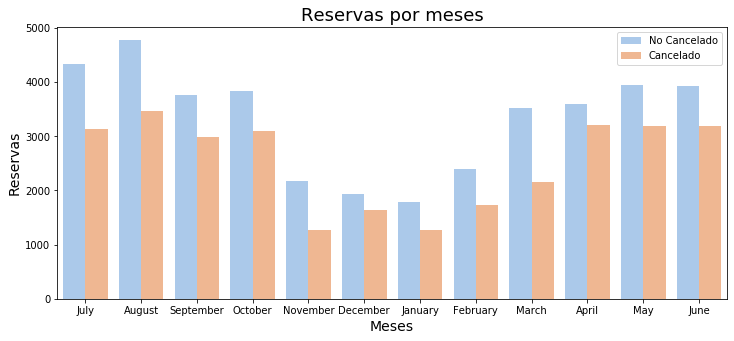

In [3]:
# Reservas canceladas o no por meses
plt.figure(figsize=(12,5))
meses = sns.countplot(x="arrival_date_month", hue="is_canceled", data=df_clean_aux, palette="pastel")
meses.set_title('Reservas por meses', fontsize=18)
meses.set_ylabel('Reservas', fontsize=14)
meses.set_xlabel('Meses', fontsize=14)
plt.legend(labels= ["No Cancelado", "Cancelado"])

### 3.3 Reservas por mes en función del año

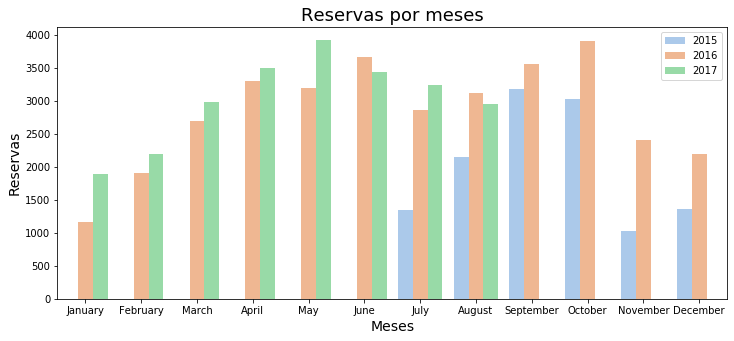

In [4]:
# Recopilacion de los datos que teniamos en cada mes por año.
plt.figure(figsize=(12,5))
meses = sns.countplot(x="arrival_date_month", hue="arrival_date_year", data=df_clean_aux,
                      order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
                      palette="pastel")
meses.set_title('Reservas por meses', fontsize = 18)
meses.set_ylabel('Reservas', fontsize = 14)
meses.set_xlabel('Meses', fontsize = 14)
plt.legend(loc="upper right")

### 3.4 Precio medio por noche y persona en cada hotel

In [5]:
#Creamos una copia para añadir la nueva columna
copia = df_clean_aux.copy()
#Creamos una nueva columna con el precio por noche por persona. Dividiemos el "adr" por el numero de (Adultos + Niños).
copia["adr_pp"] = copia["adr"]/(copia["adults"]+copia["children"])

# Filtramos por las reservas que no han sido canceladas:
copia0 = copia[copia["is_canceled"]==0]

#Calculamos el precio medio por noche de cada hotel
general_pp= copia0["adr_pp"].mean()
 
print("El precio medio del City Hotel es de: %.2f€ por persona y noche"% (general_pp))

El precio medio del City Hotel es de: 59.30€ por persona y noche


### 3.5 Precio medio por noche y persona en función del tipo de habitación

No handles with labels found to put in legend.


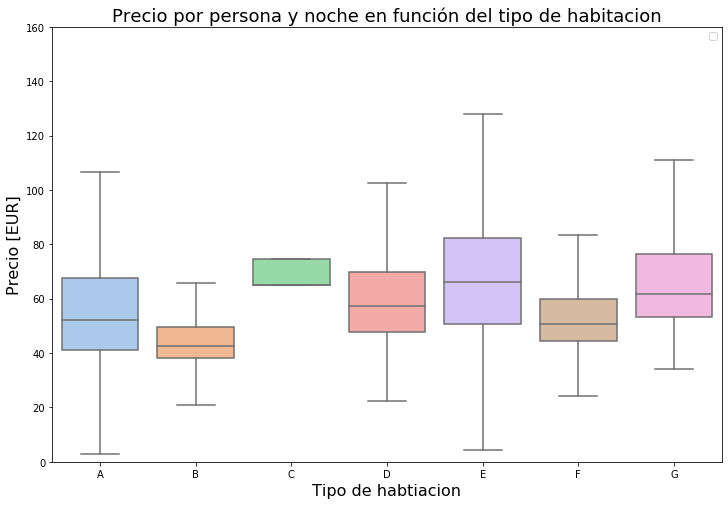

In [6]:
#Primero obtenemos el DataFrame con todas las reservas que no han sido canceladas
noCanceladas = copia[copia["is_canceled"]==0]

#Seguidamente, a partir de las reservas que no han sido canceladas, obtenemos los atributos que nos interesan para este grafico.
precio_habitacion = noCanceladas[[ "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# Realizamos el boxplot segun tipo de habitacion
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            data=precio_habitacion, 
            fliersize=0,
           palette="pastel")
plt.title("Precio por persona y noche en función del tipo de habitacion", fontsize=18)
plt.xlabel("Tipo de habtiacion", fontsize=16)
plt.ylabel("Precio [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

### 3.6 Evolución  del precio por habitacion por persona y noche en funcion del mes

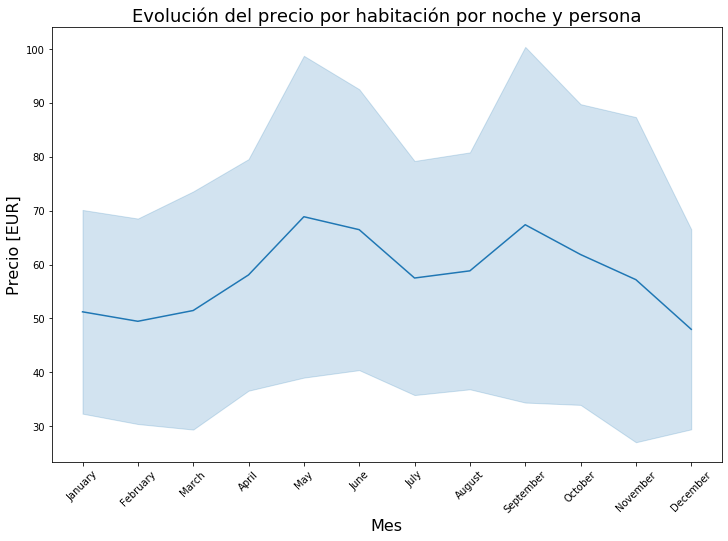

In [7]:
# De las reservas que no han sido canceladas, sacamos los atributos con los que trabajaremos:
precio_habitacion_mensual = noCanceladas[["arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

#Numeros en lista el orden que queremos que tengan los meses para ser graficados. Muy importante este paso si queremos tener los meses en orden.
meses_ordenados = ["January", "February", "March", "April", "May", "June",  "July", "August", "September", "October", "November", "December"]
precio_habitacion_mensual["arrival_date_month"] = pd.Categorical(precio_habitacion_mensual["arrival_date_month"], categories=meses_ordenados, ordered=True)

#Graficamos la evolucion del precio
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", data=precio_habitacion_mensual, 
         ci="sd",  sizes=(2.5, 2.5), palette="pastel")
plt.title("Evolución del precio por habitación por noche y persona", fontsize=18)
plt.xlabel("Mes", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Precio [EUR]", fontsize=16)
plt.show()

### 3.7  Ocupación por meses

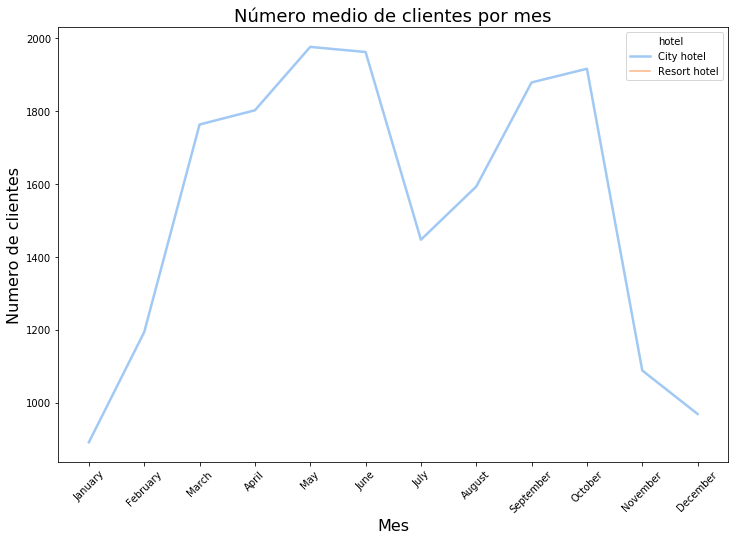

In [8]:
# Creamos un DataFrame con los datos que nos interesan.

#Contamos, por meses, el numero de clientes en cada hotel

city_clientes_mensuales = copia0.groupby("arrival_date_month")["hotel"].count()


#Creamos un DataFrame para el "City Hotel", donde tenemos el numero de clientes que recibe cada mes.
city_clientes_data = pd.DataFrame({"month": list(city_clientes_mensuales.index),
                    "hotel": "City hotel", 
                    "guests": list(city_clientes_mensuales.values)})


total_clientes_data = city_clientes_data


# Ordenamos por meses para mostrar correctamente el grafico.
meses_ordenados = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
total_clientes_data["month"] = pd.Categorical(total_clientes_data["month"], categories=meses_ordenados, ordered=True)


# A la hora de hacer la media, tenemos en cuenta que los meses de julio y agosto aparecen en 3 veces y los otros meses sólo 2.
total_clientes_data.loc[(total_clientes_data["month"] == "July") | (total_clientes_data["month"] == "August"),
                    "guests"] /= 3
total_clientes_data.loc[~((total_clientes_data["month"] == "July") | (total_clientes_data["month"] == "August")),
                    "guests"] /= 2

#Visualizamos el grafico.
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=total_clientes_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5),
            palette="pastel")
plt.title("Número medio de clientes por mes", fontsize=18)
plt.xlabel("Mes", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Numero de clientes", fontsize=16)
plt.show()

In [9]:
city_clientes_data

,month,hotel,guests
0,April,City hotel,1802.500000
1,August,City hotel,1593.333333
2,December,City hotel,969.000000
3,February,City hotel,1194.000000
4,January,City hotel,891.500000
5,July,City hotel,1447.333333
6,June,City hotel,1962.500000
7,March,City hotel,1763.500000
8,May,City hotel,1976.500000
9,November,City hotel,1088.500000


In [44]:
total_clientes_data["guests"].mean()

1540.347222222222

Durante los 3 años, el hotel ha tenido una media de unos 1500 clientes por mes.

### 3.8 Estancia de los clientes

C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


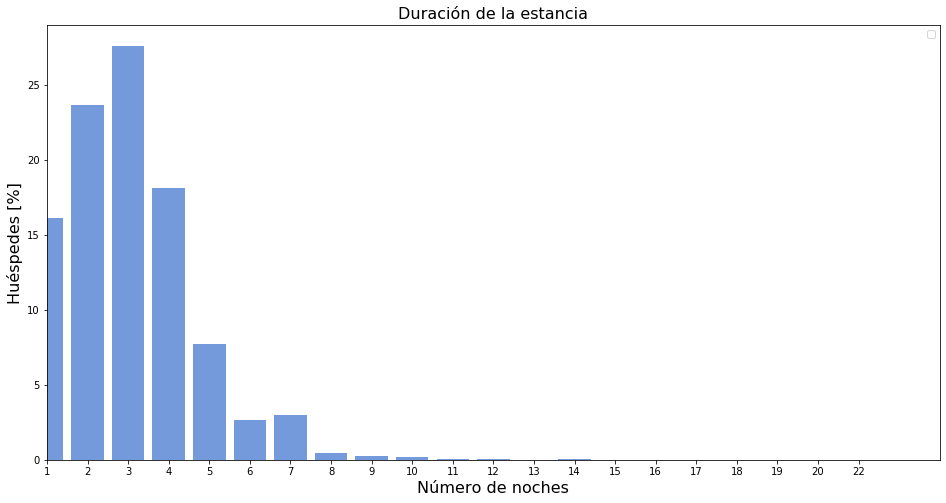

In [22]:
# Creamos un DataFrame con los atributos que utilizaremos

#Contamos el numero total de noches que esta una reserva sumando las noches de finales de semana y entre semana.
copia0["total_nights"] = copia0["stays_in_weekend_nights"] + copia0["stays_in_week_nights"]


#Calculamos el tanto por ciento de veces que se reservan cada uno de los valores posibles de noches posibles de estancias.
num_nights_cty = list(copia0["total_nights"].value_counts().index) # lista donde vemos los diferentes valores de noches que se quedan los clientes.
num_bookings_cty = list(copia0["total_nights"].value_counts()) #lista donde vemos la frecuencia de clientes que hay en cada valor posible de noches.
rel_bookings_cty = copia0["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # Calculamos el % de cada valor.



cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = cty_nights

#Graficamos
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", data=nights_data,
           color= "cornflowerblue")
plt.title("Duración de la estancia", fontsize=16)
plt.xlabel("Número de noches", fontsize=16)
plt.ylabel("Huéspedes [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

C:\Users\alexs\.conda\envs\Alex_R\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


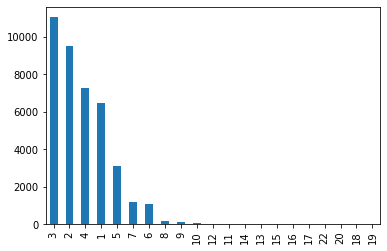

In [11]:
copia0["total_nights"].value_counts().plot('bar')

In [32]:
27.63+23.70+18.11+16.1+7.72+2.95+2.62

98.83

### 3.9 Las cancelaciones

In [21]:
#Obtenemos los datos necesarios para el siguiente gráfico:
cityhotel0 = df_clean_aux[(df_clean_aux.is_canceled == 0)]
cityhotel1 = df_clean_aux[(df_clean_aux.is_canceled == 1)]

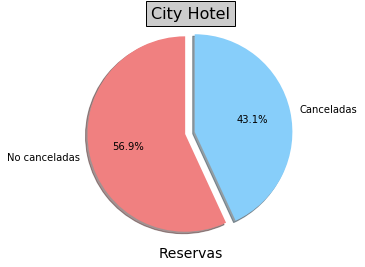

<Figure size 432x288 with 0 Axes>

In [22]:
#Los mostramos en gráficas de tarta:

labels = 'No canceladas', 'Canceladas'
sizes = [cityhotel0.is_canceled.count(),cityhotel1.is_canceled.count()]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
autopct= '%1.1f%%', shadow = True, startangle = 90)

plt.axis('equal')
plt.title('City Hotel', bbox={'facecolor':'0.8', 'pad':5}, fontsize = 16)
plt.xlabel('Reservas', fontsize = 14)
plt.figure(0)




plt.show()

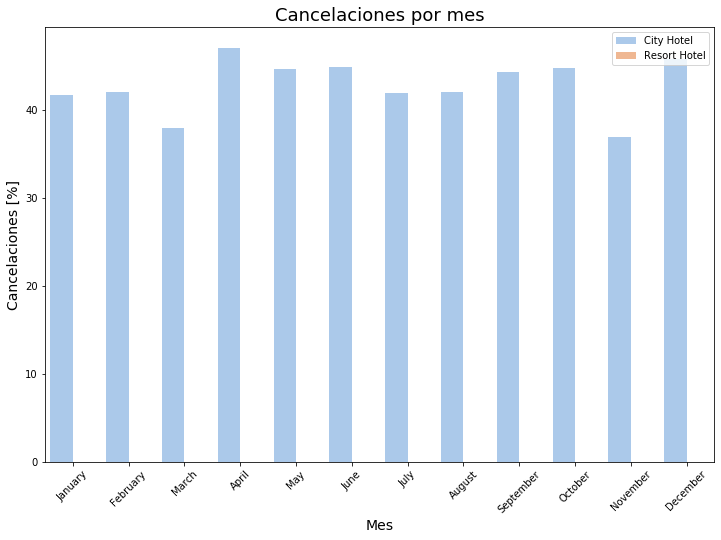

In [23]:
#Creamos un dataframe con los datos que necesitamos:

cty_book_per_month = df_clean_aux.loc[(df_clean_aux["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df_clean_aux.loc[(df_clean_aux["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()


cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = cty_cancel_data
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

#Ordenamos por mes
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)


plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data,palette = 'pastel')
plt.title("Cancelaciones por mes", fontsize = 18)
plt.xlabel("Mes", fontsize = 14)
plt.xticks(rotation=45)
plt.ylabel("Cancelaciones [%]", fontsize = 14)
plt.legend(loc="upper right")
plt.show()

### 3.10 Cuando se cancela

Finalmente estudiaremos la fecha de cancelación respecto a la fecha de llegada.

In [33]:
#Creamos un dataset nuevo y creamos una nueva columna 'arrival_date' combinando 'arrival_date_year', 'arrival_date_month' y 'arrival_date_day_of_month':
canceled_df = df_clean_aux[df_clean_aux['reservation_status'] == 'Canceled'].copy()
canceled_df['arrival_date'] = canceled_df['arrival_date_year'].astype(str) + '-' + canceled_df['arrival_date_month'] + '-' + canceled_df['arrival_date_day_of_month'].astype(str)
#Pasamos ambas fechas al mismo formato para poder restarlas:
canceled_df['arrival_date'] = canceled_df['arrival_date'].apply(pd.to_datetime)
canceled_df['reservation_status_date'] = canceled_df['reservation_status_date'].apply(pd.to_datetime)
#Las restamos creando una nueva variable canc_advance, que será la antelación con la que se ha cancelado una reserva:
canceled_df['canc_advance'] = canceled_df['arrival_date'] - canceled_df['reservation_status_date']
canceled_df['canc_advance'] = canceled_df['canc_advance'].dt.days
#Añadimos otra columna en la que mostramos que nos hubieran supuestos estas reservas (multiplicando valor medio de noche por dias de estancia)
canceled_df['no_income']=  (canceled_df['stays_in_weekend_nights'] + canceled_df['stays_in_week_nights'])*general_pp

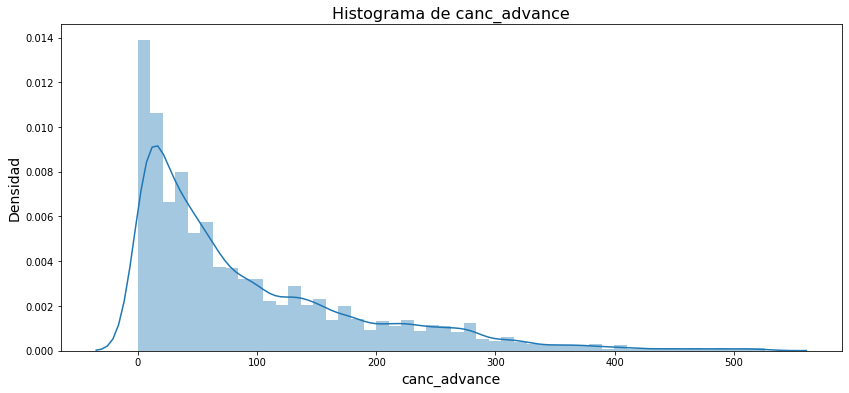

In [34]:
#Miramos la distribución de la nueva variable que hemos creado:
plt.figure(figsize = (14,6))
sns.distplot(canceled_df['canc_advance'], kde = True)
plt.title('Histograma de canc_advance',fontsize = 16)
plt.xlabel('canc_advance', fontsize = 14)
plt.ylabel('Densidad', fontsize = 14)
plt.show()

Podemos ver que cuanta menos antelación más cancelaciones tenemos, y eso es exactamente lo opuesto de lo que a los hoteles les interesa, sin duda un motivo de peso para justificar la creación de un modelo predictivo para poder prever estas cancelaciones y actuar en consecuencia a priori.

A continuación calcularemos el porcentaje de reservas que se han cancelado con menos de 10 días de antelación (incluyendo el mismo 10), ya que consideraremos que éstas serían las que los hoteles no tendrían tiempo de reemplazar. Hemos escogido este número de manera arbitraria (con lógica y sentido común), pero se podría ajustar a conveniencia si se tuviesen más datos al respecto.

In [35]:
bkgs_10 = (canceled_df[canceled_df['canc_advance']<=10]['canc_advance'].count()/canceled_df['canc_advance'].count())*100
print (bkgs_10.round(2),'%')

14.61 %


Podemos ver que el 14.61% de las reservas se han cancelado con menos de 10 días de antelación, lo que supondría una pérdida de ingresos muy destacable.

Suponiendo que todas las reservas que se cancelaron con 10 dias o menos de antelacion no pudieron ser remplazables por otros clientes. Los ingresos que dejaria de percibir el hotel en los 3 años fueron (usando el valor medio de precio de estancia):

In [37]:
canceled_df[canceled_df['canc_advance']<=10]['no_income'].sum()

765632.3672917595

Con las suposiciones anteriores, podemos aproximar que en 3 años, el hotel ha dejado de ingresar 765.632€ con las habitaciones canceladas con 10 o menos dias de antelacion. Lo que dejar de ingresar unos 250.000€ al año.

De esta manera, podemos ver de primera mano los enormes beneficios que un modelo predictivo de las cancelaciones podría llegar a suponer para los responsables de los hoteles, ya que podrían modular su estrategia de ventas en consecuencia y amortiguar así el efecto de las elevadas cancelaciones, maximizando a la vez sus ingresos de manera considerable.